In [0]:
import pandas as pd

house = pd.read_csv("AmesHousing_1.txt", sep="\t")
house.head()

# 1.0 - Introduction 

In the last lesson, we completed the workflow illustrated below. We learned to use frequency distribution tables to bring the data to a comprehensible form to find patterns.

<img width="600" src="https://drive.google.com/uc?export=view&id=1IC74sq9FboHFb6-x_zkFybqKutnaxEy8">

Frequency tables, however, are not the only way of bringing data to a comprehensible form.

<img width="600" src="https://drive.google.com/uc?export=view&id=1y9K5lxIwwgXvn-Vuc35SLkxhftIDHO2k">


Throughout this next lessons we'll learn to summarize the distribution of a variable with a single value. Depending on the particular characteristics of a distribution, we'll see that we can summarize it using the **mean**, the **weighted mean**, the **median**, or the **mode**.

We'll also learn to measure the variability in a distribution. If we have a distribution A with the values [3, 3, 3, 3], and a distribution B with [30, 1, 15, 43], we can clearly see that there's much more variability (diversity) in B. We'll learn to quantify variability using measures like **variance** and **standard deviation**.

Once we understand the measures of variability, we can then learn how to locate a value in a distribution, and determine how it compares to other values. For instance, when we analyze salaries, we might want to find out whether a salary of $75000 is common or extreme inside a company. We'll learn to answer this question with precision using a **z-score**.

In this first mission, we'll have a detailed discussion about the **mean**. We already learned briefly about the mean in the previous lessons, but here we discuss the concept again to give the explanations much more depth.

# 2.0 - The mean

Let's say we want to summarize the distribution below with a single value that is representative of the distribution as a whole.

$$
[0,1,4,7,8,10]
$$

Intuitively, we need to take into account equally every single value in the distribution if we want to find a good summary value that's representative of the entire distribution. We could try to sum all the values in the distribution, and then divide the total by the number of values we added — this way we'll manage to take into account equally every value in the distribution:

$$
\frac{0+1+4+7+8+10}{6} = \frac{30}{6} = 5
$$

When we compute the summary value of a distribution in this way, we call the value the **arithmetic mean**, or the **mean.** For our distribution above, the mean is 5.

We have good reasons to consider 5 a representative value for the distribution above. First, notice that 5 is right at the center of the distribution's range, which is 0 - 10 (0 is the minimum value in the distribution, and 10 is the maximum value):

<img width="400" src="https://drive.google.com/uc?export=view&id=1p82X1D8VvrajTFJcWHi3RXutOdwEfuxl">

Also, each value is fairly close to the mean. The nearest value to the mean is 4, which is just 1 unit away from the mean, while the farthest values are 0 and 10, located 5 units away from the mean.

<img width="400" src="https://drive.google.com/uc?export=view&id=1vIxSItydskQFlo_kZnZDerQAm61raKmd">


Although the distance for each individual value varies, the sum of the distances of the values that are below the mean is equal to the sum of the distances of the values that are above the mean:

<img width="400" src="https://drive.google.com/uc?export=view&id=15Xfnw8QCLtlyuPzJVZInUopV0AGvzsY2">


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- We assigned a few values to the **distribution** variable in the cell below.
  - Compute the **mean** of this distribution and assign the result to a variable named **mean**.
  - Find out whether the value of the **mean** is at the center of the distribution's range (0 - 13). If it is, assign **True** to a variable named **center**, otherwise assign **False**.
  - Check whether the sum of the distances of the values that are below the mean is equal to the sum of the distances of the values that are above the mean.
    - Measure the distance of each value from the mean. You can ignore potential values that are equal to the mean because the distances will be 0 for these cases.
    - Sum up the distances of the values that are above the mean, and then sum up separately the distances of the values that are below the mean.
    - Compare the results of the two sums — if they are equal, assign **True** to a variable named **equal_distances**, otherwise assign **False**.

In [4]:
distribution = [0,2,3,3,3,4,13]

# put your code here
mean = sum(distribution)/len(distribution)
center = False

lista = []

below = 0
above = 0

for i in distribution:
  if i <= mean:
    below += mean-i
  if i >= mean:
    print(i)
    above += i-mean

print(below)

4
13
9.0


# 3.0 - The Mean as a Balance Point

In the last exercise, we observed from the distribution [0,2,3,3,3,4,13] that the mean 4 is not in the center of the 0 - 13 range interval:

<img width="600" src="https://drive.google.com/uc?export=view&id=1319c_4rheyZTKae7-QkA0xJ0hSmybg41">

As a consequence, we should avoid thinking of the mean as being the center of a distribution's range. In some cases, the mean will be equivalent to the center of the distribution's range, but we've just seen that this doesn't hold true for all distributions.

We should think of the mean as being the value located at that particular point in the distribution where the total distance of the values below the mean is the same as the total distance of the values that are above the mean. In our last exercise, we saw that this holds true for the distribution [0,2,3,3,3,4,13].

<img width="500" src="https://drive.google.com/uc?export=view&id=1K8bLxuug28x7J33dDCGmR_N2TEhchUqj">

In fact, this is true for the distribution of any variable measured on an interval or ratio scale.

To give students a better intuition for this property of the mean, it's common in the literature to describe the mean as the balance point of a lever.

<img width="400" src="https://drive.google.com/uc?export=view&id=1E9FmRHl6wYULyBCqXJcmpiuhfvs_7Hre">

If the total distances above and below the mean were equivalent to the forces exerted by the weights on the rod of the lever, then there would be the same amount of force exerted on each side of the mean. This will make the rod stay in perfect equilibrium:


<img width="400" src="https://drive.google.com/uc?export=view&id=1iziEdt0WVaRzz8YZ39Iaj8qTNoidrrXO">

Now that we've seen that the total distances below the mean equal the total distances above the mean, we'll do a sanity check of this rule by measuring the distances for 5000 different distributions in the exercise below.

In [5]:
from numpy.random import randint, seed
equal_distances = 0

for i in range(1000):
    seed(i)
    # generate ten random numbers between 0 and 1000
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    for value in distribution:
        if value == mean:
            continue # continue with the next iteration because the distance is 0
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1
        
print(equal_distances)

1000


# 4- Defining the Mean Algebraically

A very useful property of the **mean** is that it can be defined algebraically in a simple way. This is how we can define the **mean** for any population of N values ( N is the number of values in the population):

$$
\text{population mean} = \frac{x_1 + x_2 + \ldots + x_N}{N}
$$

By convention, the **mean** of a population is denoted with the Greek letter $\mu$ (pronounced "mew"). So we rewrite the formula above:

$$
\mu = \frac{x_1 + x_2 + \ldots + x_N}{N}
$$

Let's say the distribution $[0,2,3,3,3,4,13]$ represents a population. The distribution has 7 values, so $N=7$ . Let's plug the values into the formula above:


<img width="300" src="https://drive.google.com/uc?export=view&id=1OZNTBFIWLDZ_RTwrPjoPgyK4zcAfh1HJ">


Above, we computed the **mean** for a population. When we compute the mean for a sample, we need to use a slightly different notation to indicate that we're computing the mean for a sample and not for a population. Instead of $\mu$, we denote the **sample mean** using $\overline{x}$  (pronounced "x-bar"), and we use $n$ instead of $N$ to denote the number of values in the sample. This is how we could define the sample mean algebraically:


$$
\overline{x} = \frac{x_1 + x_2 + \ldots + x_n}{n}
$$


Let's say we **sample three values** from the distribution used above and end up with the sample $[2,3,4]$. Let's plug the values into the sample **mean** formula:

<img width="200" src="https://drive.google.com/uc?export=view&id=1VF1C7ccfyTvDLIix0cnszo5w2zJWGVlJ">


Alternative notation exists for the **sample mean**. Besides $\overline{x}$ , the **sample mean** is denoted in other statistics resources with $M$, $\overline{X}$  (uppercase X-bar), or $\overline{x_n}$. Throughout our course, we use the symbol $\overline{x}$ to refer to the **sample mean.**


<img width="200" src="https://drive.google.com/uc?export=view&id=1y-yv0rjjCpc_Rv-zyOkrVRMwPBr22csB">


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Indicate whether the following sentences are **true** or **false**.
  - We use the symbol $\mu$  to denote both the **population** and the **sample mean**. Assign **True** or **False** to a variable named **one**.
  - If a population has 8 values, then $n=8$ . Assign **True** or **False** to a variable named **two**.
 - $\overline{x}$ is a symbol used as an alternative to $M$, $\overline{X}$  or $\overline{x_n}$  to denote the **population mean**. Assign **True** or **False** to a variable named **three**.

In [0]:
# put your answer here
one = False
two = False
three = True

# 5 - An Alternative Definition

Previously we defined the population mean as:

$$
\mu = \frac{x_1 + x_2 + \ldots + x_N}{N}
$$

The $x_1 + x_2 + \ldots + x_N$ part is often rewritten as $\displaystyle \sum_{i=1}^N x_i$:


$$
\mu = \frac{x_1 + x_2 + \ldots + x_N}{N} = \frac{\displaystyle \sum_{i=1}^N x_i}{N}
$$

The $\displaystyle \sum$ symbol is a Greek letter, and it's pronounced "sigma" or "capital sigma". In mathematics, $\displaystyle \sum$ indicates the addition of a series of numbers. Let's say we have this distribution $D$:

$$
D = [2,4,6]
$$

The sum of the distribution $D$ is $2+4+6=12$. In mathematics, we usually don't use words from the natural language, so the **"the sum of the distribution D"** part becomes $\displaystyle \sum D$

$$
\displaystyle \sum D = 2+4+6 = 12
$$

Now let's say we have the following distribution $X$  which is a population and is composed of three unknown values:

$$
X = [x_1,x_2,x_3]
$$

The sum of the values is $\displaystyle \sum X = x_1 + x_2 + x_3$. When dealing with unknown values it is customary (but not necessary) to rewrite $\displaystyle \sum X$ as $\displaystyle \sum_{i=1}^N x_i$:

$$
\displaystyle \sum X = \displaystyle \sum_{i=1}^N x_i = x_1 + x_2 + x_3
$$

You should think of $\displaystyle \sum_{i=1}^N x_i$ in terms of a for loop, where the iteration variable is $i$. This means that $i$  will take a different value for each iteration. $i = 1$ defines the starting value of the loop, which is $i$ . For every new iteration, the previous value of $i$  is incremented by 1. The iteration stops when $i=N$ . For our distribution $X$  above, $N=3$, so we'll have three iterations of the loop:

- For the first iteration, $i=1$. The $i$ in $x_i$ will become $1$, so we'll have $x_1$ .
- For the second iteration, $i=2$. The $i$ in $x_i$ will become $2$, so we'll have  $x_2$.
For the third iteration, $i=3$. The $i$  in  $x_i$ will become $3$, so we'll have $x_3$. At this point the iterations stops because $i=N$.

This is one way we could code in Python a similar logic:

<img width="600" src="https://drive.google.com/uc?export=view&id=1l9sUvD1ynyzj9Mi0piiAaNmFPNXyBiRh">

While this is merely notation, it's important to understand it because we'll use it repeatedly as we move forward, and it'll also help you understand other statistics resources. To sum up, these are the ways we can define the population mean algebraically:

$$
\mu = \frac{x_1 + x_2 + \ldots + x_N}{N} = \frac{\displaystyle \sum X}{N}=\frac{\displaystyle \sum_{i=1}^N x_i}{N}
$$

For the sample mean, there's just a slight change in notation. $\mu$  becomes $\overline{x}$, and $N$ becomes $n$:


$$
\overline{x} = \frac{x_1 + x_2 + \ldots + x_n}{n} = \frac{\displaystyle \sum X}{n}=\frac{\displaystyle \sum_{i=1}^n x_i}{n}
$$

Algebra is very flexibile, and you'll also see in other statistics resources $\frac{\displaystyle \sum_{i=1}^n x_i}{n}$ changed to $\displaystyle \frac{1}{n}(\displaystyle \sum_{i=1}^n x_i)$ - these two mathematical expressions are equivalent.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Write a function that behaves just like $\frac{\displaystyle \sum_{i=1}^N x_i}{N}$
  - The function takes in an array of numbers and returns its **mean** value.
  - Inside the function, write a **for loop** to iterate over the values in the array and sum them up. We can use **sum()** to compute the sum of an array without using a for loop, but for learning purposes we advise you to use a for loop just to understand better how $\frac{\displaystyle \sum_{i=1}^N x_i}{N}$  works.
- Use the function you wrote to compute the mean of the three distributions we already defined in the code editor:
  - For the distribution in **distribution_1** assing the mean to a variable named **mean_1**.
  - For the distribution in **distribution_2** assign the mean to a variable named **mean_2.**
  - For the distribution in **distribution_3** assign the mean to a variable named **mean_3.**

In [7]:
distribution_1 = [42, 24, 32, 11]
distribution_2 = [102, 32, 74, 15, 38, 45, 22]
distribution_3 = [3, 12, 7, 2, 15, 1, 21]

# put your code here

def media(lista):
  soma = 0
  for i in lista:soma += i
  return round(soma/len(lista),1)

media(distribution_2)

46.9

# 6 - Introducing the Data

So far we've discussed a few theoretical aspects about the **mean** and used a few simple distributions (like [2,4,6]) to make the explanations easier to grasp. At this point, we introduce a real-world data set to discuss the **mean** in the context of large and real-world distributions.

We'll be working with a **data set** that describes characteristics of **houses sold** between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set. Here's a brief extract from the data set:

| __ |Order | PID | MS SubClass | MS Zoning | Lot Frontage | Lot Area | Street | Alley | Mo Sold | Yr Sold | Sale Type | Sale Condition | SalePrice |       
|-------|-----|-------------|-----------|--------------|----------|--------|-------|---------|---------|-----------|----------------|-----------|--------|
| 0     | 1   | 526301100   | 20        | RL           | 141.0    | 131770 | Pave  | 0       | 5       | 2010      | WD             | Normal    | 215000 |
| 1     | 2   | 526350040   | 20        | RH           | 80.0     | 11622  | Pave  | 0       | 6       | 2010      | WD             | Normal    | 105000 |
| 2     | 3   | 526351010   | 20        | RL           | 81.0     | 14267  | Pave  | 12500   | 6       | 2010      | WD             | Normal    | 172000 |
| 3     | 4   | 526353030   | 20        | RL           | 93.0     | 11160  | Pave  | 0       | 4       | 2010      | WD             | Normal    | 244000 |
| 4     | 5   | 527105010   | 60        | RL           | 74.0     | 13830  | Pave  | 0       | 3       | 2010      | WD             | Normal    | 189900 |


The data set was collected by professor [Dean DeCock](http://www.truman.edu/faculty-staff/decock). He described in great detail the data collection process [in this paper](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf) published in the Journal of Statistics Education. The documentation of the data set can be found [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt).

We slightly modified the original data set for teaching purposes. You can download the original data set from [here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt) and the modified version from our interface. The documentation is the same for both data sets.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- The data set is stored in a file named **AmesHousing_1.txt**. Read the file as a pandas **DataFrame**, and store it in a variable named **houses.**
  - The values in each row are tab-separated, which means **AmesHousing_1.txt** is a TSV (tab-separated value) file. This is different from a CSV (comma-separated values) file, where the values are separated by commas, not by tab a tab character.
  - Use the **pd.read_table()** function or **pd.read_csv(sep = '\t')** to read in the data set.
- With the help of the documentation and by exploring the data set yourself, asses the truth value of the following sentences:
  - This data set has variables measured on every scale of measurement: nominal, ordinal, interval and ratio. (If you think this is true, assign the boolean **True** to the variable **one**, otherwise assign **False**.)
  - The **SalePrice** column is continuous and measured on an interval scale. (If you think this is true, assign the boolean **True** to the variable **two**, otherwise assign **False**.)
  - In the paper he published [here](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf), professor Dean DeCock wrote "The initial Excel file contained 113 variables describing 3970 property sales that had occurred in Ames, Iowa between 2006 an 2010". If we wanted to measure the mean sale prices for all the houses sold between 2006 and 2010 in Ames, Iowa, the data stored in the **AmesHousing_1.txt** would be a sample. (If you think the last sentence is true, assign the boolean **True** to the variable **three**, otherwise assign **False**.)

In [12]:
import pandas as pd
pd.set_option('display.max_columns', 500)

# put your code here

houses = pd.read_table("AmesHousing_1.txt")
houses.head()

one = True
two = True#?
three = False

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


# 7 - Mean House Prices


Let's say we're interested to analyze the distribution of the **sale prices** of the houses. We can get a good overview about this distribution using the **Series.describe()** method:

In [0]:
house.SalePrice.describe()

We can see that the **distribution has a large range**: the **minimum** **sale price** is 12789 while the **maximum** is 755000. Among this diversity of prices, we can see that the **mean** (or the "balance point") of this distribution is approximately 180796. The mean gives us a sense about the typical sale price in this distribution of 2930 prices.

If we want to compute only the **mean**, it's more convenient to use the **Series.mean()** method:




In [9]:
house['SalePrice'].mean()

180796.0600682594

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Use the function you wrote in section 5 to compute the **mean** of the **SalePrice** distribution. Assign the result to a variable named **function_mean**.
- Use **Series.mean()** to compute the **mean** of the **SalePrice** distribution. Assign the result to a variable named **pandas_mean**.
- Compare **function_mean** with **pandas_mean** using the == operator. Assign the result of the comparison to a variable named **means_are_equal**.
  - The two means should be equal, so we expect the comparison to resolve to True.

In [13]:
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)

# put your code here
function_mean = mean(houses.SalePrice)
pandas_mean = houses["SalePrice"].mean()

if (function_mean == pandas_mean):
  means_are_equal = True
  
means_are_equal

True

#8 - Estimating the Population Mean

In practice, we almost always work with samples. But most of the times we're not interested in answering questions about samples — we want to answer questions about populations. A lot of the questions we want to answer in practice can be reduced to finding the mean of a population:

- What is the mean amount of money our customers spent last year on our website?
- What is the mean amount of time customers spent daily the first week after the promotion we ran? How does that compare to the mean amount of time spent daily in the week before the promotion?
- What is the mean sale price of a house in Ames, Iowa for the period 2006-2010?


**When we only have a sample but want to find the mean in the population**, the best we can do is to compute the **sample mean** $\overline{x}$ and hope it's a **good estimate** for the **population mean** $\mu$. When estimating the population mean  $\mu$ using the sample mean $\overline{x}$, there are three possible scenarios:

- The sample mean $\overline{x}$ overestimates the population mean . This means that $\overline{x} > \mu$.
- The sample mean $\overline{x}$  underestimates the population mean . This means that $\overline{x} < \mu$.
- The sample mean $\overline{x}$ is equal to the population mean $\overline{x} = \mu$ . This means that .

When $\overline{x} > \mu$  and  $\overline{x} < \mu$, **sampling error occurs**. Remember that sampling error is given by the difference between a population's parameter and a sample's statistic. $\mu$  is a parameter, and $\overline{x}$  is a statistic, so the sampling error is given by:

$$
\text{sampling error} = \mu - \overline{x}
$$


**Our aim is to reduce the sampling error**. Two important factors that influence the sampling error are:

- **Sample representativity** — the more representative a sample is, the closer $\overline{x}$  will be to $\mu$ .
- **Sample size** — the larger the sample, the more chances we have to get a representative sample. By consequence, this means less sampling error.
This emphasizes once more the importance of the sampling process, where we should try our best to get a representative sample.

In the exercise below, we'll try to visualize on a scatter plot how the sampling error changes as we increase the sample size. Just to prove a point, we'll assume that our data set describes all the houses sold in Ames, Iowa between 2006 and 2010.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Compute the **mean** of the **SalePrice** variable. We'll assume that the data we have is a population relative to the question "What's the mean sale price of a house in Ames, Iowa for the period 2006-2010?".
- For each iteration of a for loop that iterates 101 times:
  - Sample the **SalePrice** distribution using the **Series.sample()** method.
    - For the first iteration, the **random_state** parameter is 0, for the second iteration is 1, for the third is 2, and so on.
    - For the first iteration, the sample size is 5.
    - The last sample size is 2905 (which is close to 2930, the population's size).
    - To achieve that, you'll need to increment the sample size by 29 for every new iteration. Note that you'll first have to define the sample size with a value of 5 outside the loop.
  - Compute the sample mean.
  - Compute the sampling error. For answer checking purposes, use $parameter - statistics$ , not $statistics - parameter$.
- Generate a scatter plot to represent visually how the sampling error changes as the sample size increases.
  - Place the sample sizes on the x-axis.
  - Place the sampling errors on the y-axis.
  - Use plt.axhline() to generate a horizontal line at 0 to illustrate the point where the sampling error is 0.
  - Use plt.axvline() to generate a vertical line at 2930 to illustrate the population size.
  - Label the x-axis "Sample size".
  - Label the y-axis "Sampling error".




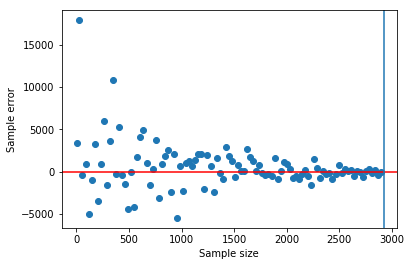

In [44]:
# put your code here
import matplotlib.pyplot as plt

sample_error = []
size_sample = []

SL_mean = houses["SalePrice"].mean()

sample_error.append(SL_mean - houses["SalePrice"].sample(5, random_state=x).mean())
size_sample.append(5)

for x in range(0,101):
  sample = houses["SalePrice"].sample(x*29, random_state=x)
  size_sample.append(x*29)
  sample_mean = sample.mean()
  sample_error.append(SL_mean - sample_mean)

len(sample_error)


fix, ax = plt.subplots()
ax.scatter(size_sample, sample_error)
plt.axhline(0, color="red")
plt.axvline(2930)
plt.xlabel("Sample size")
plt.ylabel("Sample error")
plt.show()

# 9 -  Estimates from Low-Sized Samples

We've seen in the previous exercise that the general tendency for the sampling error is to decrease as the sample size increases. This tendency, however, has exceptions. For instance, there are cases where small sample sizes (100-500 sample points) gave us better estimates for the population mean $\mu$  than large sample sizes (2500 sample points or more) did.

<img width="400" src="https://drive.google.com/uc?export=view&id=1b1PbHEITnmE2I-sJRCuZaG24vh6w6iVL">


For any given sample size, we can have many combinations of values. For instance, for a sample size of 3, we can have many possible combinations of sale prices: [220000, 143000, 281000], [123600, 209500, 202665], [287000, 142500, 440000], etc. Most of the samples of size 3 will give a good estimate of the population mean $\mu$. To prove this point, in the code below we will:

Measure the mean for 10000 samples of size 3.
Use a histogram to visualize the distribution of the sample means.
Draw a vertical line corresponding to the population mean $\mu$.



Text(0.5, 1.0, 'Sample Size = 3')

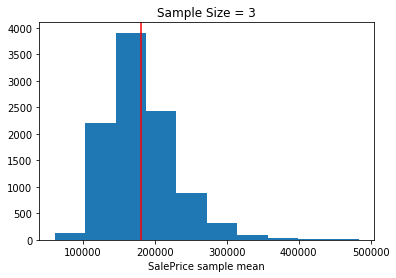

In [21]:
means = []
for i in range(10000):
  sample = houses['SalePrice'].sample(3, random_state=i)
  means.append(sample.mean())

plt.hist(means)
plt.axvline(houses['SalePrice'].mean(),color='red')
plt.xlabel("SalePrice sample mean")
plt.title("Sample Size = 3")

We can see that most sample means cluster around the population mean. This means that when we take a sample of size 3 and compute $\overline{x}$, we have fairly good chances to get a good estimate for the population mean $\mu$. This explains what we've seen in the scatter plot above, where we got good estimates from low-sized samples.

It's also worth noting that the mean of the 10000 sample means we measured is very close to the population mean $\mu$:




In [45]:
print(sum(means) / len(means))

print(houses['SalePrice'].mean())

180824.7253000002
180796.0600682594


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Take 10000 samples of sample size 100 from the population of sale prices and measure the mean of each sample. For each of the 10000 iterations of a for loop:
  - Use **Series.sample()** to take a sample of size 100 from the **SalePrice** variable. The **random_state** parameter is 0 for the first iteration, 1 for the second iteration, 2 for the third iteration, and so on.
  - Compute the **mean** of the sample.
- Use **plt.hist()** to generate a histogram to visualize the distribution of sample means.
  - Draw a vertical line for the population mean.
  - Label the x-axis "Sample mean".
  - Label the y-axis "Frequency".
  - Set the range of the x-axis to (0,500000). This is the same range as the histogram we built above has. Can you observe any obvious difference between the two histograms now that we've increased the sample size?

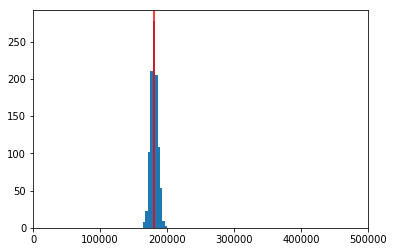

In [68]:
# put your code here
import matplotlib.pyplot as plt

means = []

for x in range(0,1000):
  means.append(houses["SalePrice"].sample(200, random_state=x).mean())
  

#fig, ax = plt.subplots
plt.hist(means)
plt.axvline(houses["SalePrice"].mean(), color="red")
plt.xlim(0,500000)
plt.show()

# 10 - Variability Around the Population Mean



In the previous exercise, we observed that with a sample size of 100 the sample means vary much less around the population mean than in the case of a sample size of 3.


<img width="600" src="https://drive.google.com/uc?export=view&id=1S2jlkc4NLUHR_MZnx5Rs14VsvO4Ft-FL">


Generally, as we increase the sample size, there will be less and less variability around the population mean. If there's less variability, there are less chances to get a poor estimate for the population mean — the worst sample means we can get are fairly close to the population mean, which is good.

We can clearly see that that sample means vary less and less and less as we increase the sample size:

<img width="600" src="https://drive.google.com/uc?export=view&id=14mUZbQk54jrS6iU0QwdeeXgYwxRPQmda">

# 11 - The Sample Mean as an Unbiased Estimator

If we took all the possible samples for a given sample size, we'd observe that the mean of the sample means will be equal to the population mean. Consider this small population of values:

$$
X = [0,3,6]
$$

The mean $\mu$ of this population is $\frac{0+3+6}{3} = 3$. Now let's take every possible sample of size 2, and compute the mean for each sample:

<img width="200" src="https://drive.google.com/uc?export=view&id=19Mgod57-sxkjAbJxjVesBb87T6tiqrrI">


Now let's find the mean of the sample means. We add up the means we got for each of the six samples above and divide by the number of samples:

$$
\frac{1.5 + 3 + 1.5 + 4.5 + 3 + 4.5}{6} = \frac{18}{6} = 3
$$


The value we got is the same as the population mean $\mu$. So on average the sample mean is equal to the population mean. This is true for the distribution above and for any other distribution of real numbers.

When a statistic is on average equal to the parameter it estimates, we call that statistic an **unbiased estimator**. In our case, the sample mean $\overline{x}$ is an **unbiased estimator** for the population mean $\mu$ .

This also holds true if we sample with replacement. When we do sampling with replacement, we sample one value, and then we put it back in the population, which means we can sample that value again. For instance, if we want a sample of size 2 from the population above, and we sample with replacement, this could happen:

- We extract one value randomly and get a 3.
- Because we sample with replacement, we put the value back in the population.
- We extract one more value and get a 3 again. We end up with this sample: [3,3].

Below we can see the samples of size 2 we can get when we sample with replacement from the population above. We also show the mean for each sample:

<img width="200" src="https://drive.google.com/uc?export=view&id=1okOCwMOvH-7bY5yhGlgOxpQBaMEYItiF">


The mean of the sample means amounts to 3 again, and confirms that  is an unbiased estimator for the population mean  when we sample with replacement:

$$
\frac{1.5 + 3 + 0 + 1.5 + 4.5 + 3 + 3 + 4.5 + 6}{9} = \frac{27}{9} = 3
$$

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


  - Check whether the population mean of the population [3, 7, 2] is equal to the mean of all the sample means of size 2 that we can get if we do sampling without replacement.
    - Compute the mean for each sample.
    - Compute the mean of all the sample means. Compare it with the population mean using the == operator, and assign the result of the comparison to a variable named **unbiased**.

In [76]:
# put your code here

pop = [3,7,2]
means = []

for x in pop:
  for y in pop:
    if y == x:
      pass
    else:
      means.append((x+y)/2)


if sum(means)/len(means) == sum(pop)/len(pop):
  print("iguais")

iguais


# 12 - Next Steps

In this mission, we explored in more depth the **mean**:

- We saw that the **mean** can be intuitively understood as the **"balance point"** of a distribution.
- We learned to distinguish conceptually between the **sample** and the **population mean**, and we saw that we use different notation for each case.
- We demonstrated with a few examples that the sample mean is an unbiased estimator for the population mean $\mu$.

In the next mission, we'll explore a few edge cases where it's either impossible to compute the mean, or it's possible but not theoretically sound.